In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import neurokit as nk

C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array in

    using multitaper spectrum estimation with 7 DPSS windows


C:\Users\Alx-Wo\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


        ECG_Raw  ECG_Filtered  ECG_R_Peaks  Heart_Rate  ECG_Systole  \
0     -0.015869     -0.000658          NaN         NaN            0   
1     -0.011703      0.002252          NaN         NaN            0   
2     -0.009766      0.002327          NaN         NaN            0   
3     -0.013321     -0.001895          NaN         NaN            0   
4     -0.009583     -0.000528          NaN         NaN            0   
5     -0.006622      0.002126          NaN         NaN            0   
6     -0.006348     -0.000308          NaN         NaN            0   
7     -0.006744     -0.000859          NaN         NaN            0   
8     -0.002258      0.000677          NaN         NaN            0   
9     -0.005173     -0.002439          NaN         NaN            0   
10    -0.004074     -0.004449          NaN         NaN            0   
11    -0.001907     -0.002484          NaN         NaN            0   
12     0.002472     -0.001438          NaN         NaN            0   
13    

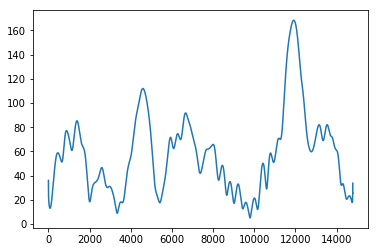

In [2]:
#Just as a comparison I looked at some "perfect" EDA without any errors/artifacts
df = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit.py/master/examples/Bio/bio_100Hz.csv")
bio = nk.bio_process(ecg = df["ECG"], eda = df["EDA"], sampling_rate = 100)

results2 = pd.DataFrame(bio["df"])
print (results2)
results2["ECG_HRV_LF"].plot()

In [2]:
def getDFHandler_StatisticsFile(filePath):
    try:
        measurement_df = pd.read_csv(filePath, index_col = 0)
    except IOError:
        print("Could not open file, wrong path?")
    return measurement_df

In [16]:
#Creating a DataFrame to visualize the EDA Data by writing it all in one dataframe and writing it to a csv

lead = "H0"
i = 1
numOfParticipants = 23
skipParticipants = [3, 4, 5, 6, 14, 15, 23]

PSFrame = pd.DataFrame(columns = ['Participant', 'Group', 'EDANormalizedAverage'])
PSVSFrame = pd.DataFrame(columns = ['Participant', 'Group', 'EDANormalizedAverage'])
while i <= numOfParticipants: 
    participant = lead + str(i).zfill(2)
    if not (i in skipParticipants):
        #do stuff
        print ("getting PSPluxData for participant " + participant)
        PSPATH = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\" + participant + "\\PLUX\\PSStatistics_EDAOnly_Normalized.csv"
        PSFrame.loc[i] = [participant, "Sleeve off", getDFHandler_StatisticsFile(PSPATH)["EDA_Raw_MedianFiltered_Normalized"].mean()]
    else:
        #skip participant
        print ("skipping participant " + participant + "\n")
    i += 1
#averageValuesPS = pd.concat(listOfPSData).groupby(level=0).mean()
print(PSFrame)
i = 1
while i <= numOfParticipants: 
    participant = lead + str(i).zfill(2)
    if not (i in skipParticipants):
        #do stuff
        print ("getting PSVSData for participant " + participant)
        PSVSPATH = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\" + participant + "\\PLUX\\PSVSStatistics_EDAOnly_Normalized.csv"
        PSVSFrame.loc[i] = [participant, "Sleeve on", getDFHandler_StatisticsFile(PSVSPATH)["EDA_Raw_MedianFiltered_Normalized"].mean()]
    else:
        #skip participant
        print ("skipping participant " + participant + "\n")
    i += 1
print(PSVSFrame)
#averageValuesPSVS = pd.concat(listOfPSVSData).groupby(level=0).mean()
EDA_Data = pd.DataFrame(columns = ['Participant', 'Group', 'EDANormalizedAverage'])
EDA_Data = EDA_Data.append(PSFrame)
EDA_Data = EDA_Data.append(PSVSFrame)
print(EDA_Data)
EDA_Data.to_csv("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\Zwischenspeicher.csv")


getting PSPluxData for participant H001


C:\Users\Alx-Wo\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


getting PSPluxData for participant H002
skipping participant H003

skipping participant H004

skipping participant H005

skipping participant H006

getting PSPluxData for participant H007
getting PSPluxData for participant H008
getting PSPluxData for participant H009
getting PSPluxData for participant H010
getting PSPluxData for participant H011
getting PSPluxData for participant H012
getting PSPluxData for participant H013
skipping participant H014

skipping participant H015

getting PSPluxData for participant H016
getting PSPluxData for participant H017
getting PSPluxData for participant H018
getting PSPluxData for participant H019
getting PSPluxData for participant H020
getting PSPluxData for participant H021
getting PSPluxData for participant H022
skipping participant H023

   Participant       Group  EDANormalizedAverage
1         H001  Sleeve off              0.626225
2         H002  Sleeve off              0.721715
7         H007  Sleeve off              0.126485
8         H008 

C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


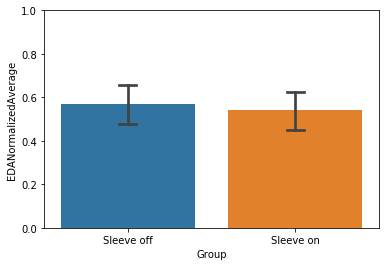

In [17]:
#Barplot to plot the summary of the EDADataframe from above.
EDAData = getDFHandler_StatisticsFile("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\Data\\Hauptstudie_Splitted\\Zwischenspeicher.csv")
plt.figure()
ax = sns.barplot(x="Group", y = "EDANormalizedAverage", data = EDAData, capsize = .1)
axes = plt.axes()
axes.set_ylim([0.0, 1.0])
ax.get_figure().savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Hauptstudie\\EDA_BalancedNormalizedAverage.png", dpi = 800)

In [ ]:
#The following blocks were used only for a quick and dirty visualization of our data.
#We initialized df instances for the data we wanted to inspect just once, so we dont have to wait for it everytime we plot smth new.
#Creating df instances for the fixation files
proband = "P006"
path = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\" + proband + "\\result\\Minerva_Fixations.csv"
path2 = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\" + proband + "\\result\\Antibuerger1_Fixations.csv"
path3 = "D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\" + proband + "\\result\\Powerstation17_Fixations.csv"

minerva_fixations = getDFHandler_StatisticsFile(path)
print(minerva_fixations)

antibuerger_fixations = getDFHandler_StatisticsFile(path2)
print(antibuerger_fixations)

powerstation_fixations = getDFHandler_StatisticsFile(path3)
print(powerstation_fixations)


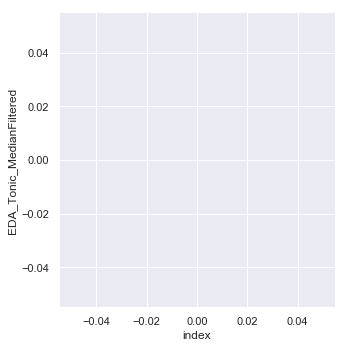

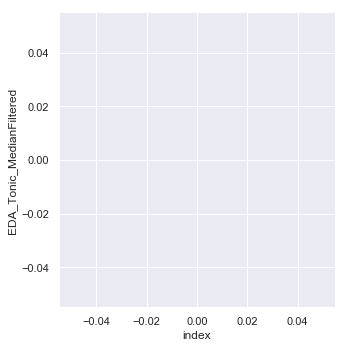

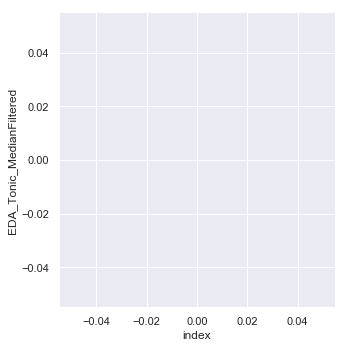

In [8]:
#To Quickly visually inspect the data initialzed above, use this notebook


#Plotting the modality
modality = "EDA_Tonic_MedianFiltered"
#plt.figure(figsize =(15, 15))
sns.set()
MinervaPlot = sns.relplot(x = "index", y = modality, data = minerva, kind = "line")
#MinervaPlot.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\P006\\PLUX\\Minerva.png")
AntibuergerPlot = sns.relplot(x = "index", y = modality, data = antibuerger, kind = "line")
#AntibuergerPlot.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\P006\\PLUX\\Antibuerger.png")
PowerstationPlot = sns.relplot(x = "index", y = modality, data = powerstation, kind = "line")
#PowerstationPlot.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\P006\\PLUX\\Powerstation.png")

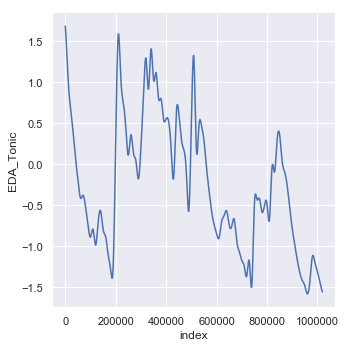

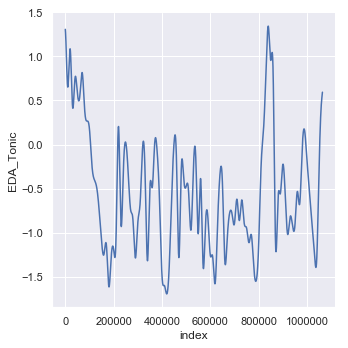

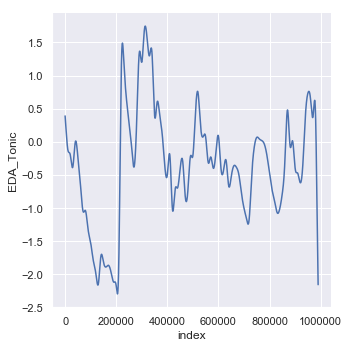

In [9]:
#To Quickly visually inspect the data initialized above, use this notebook
modality = "EDA_Tonic"
#plt.figure(figsize =(15, 15))
sns.set()
MinervaPlot = sns.relplot(x = "index", y = modality, data = minerva, kind = "line")
#MinervaPlot.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\P006\\PLUX\\Minerva.png")
AntibuergerPlot = sns.relplot(x = "index", y = modality, data = antibuerger, kind = "line")
#AntibuergerPlot.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\P006\\PLUX\\Antibuerger.png")
PowerstationPlot = sns.relplot(x = "index", y = modality, data = powerstation, kind = "line")
#PowerstationPlot.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Probanden\\P006\\PLUX\\Powerstation.png")

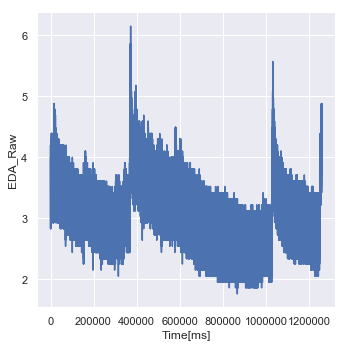

In [7]:
#Creating Rawimages for the ppt:
modality = "EDA_Raw"
sns.set()
antibuerger = antibuerger.rename(index = str, columns = {"index":"Time[ms]"})
AntibuergerFigRaw = sns.relplot(x = "Time[ms]", y = modality, data = antibuerger, kind = "line")

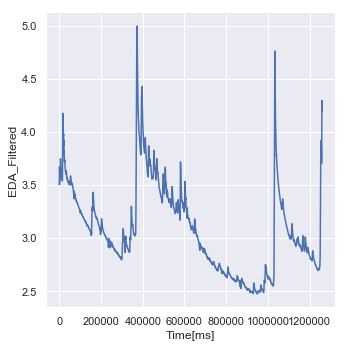

In [8]:
#Creating FilteredImages for the ppt:
modality = "EDA_Filtered"
sns.set()
AntibuergerFigFiltered = sns.relplot(x = "Time[ms]", y = modality, data = antibuerger, kind = "line")

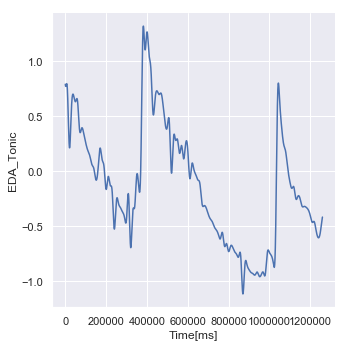

In [11]:
#Creating Phasic and Tonic images for the ppt:
modality = "EDA_Tonic"
sns.set()
AntibuergerFigTonic = sns.relplot(x = "Time[ms]", y = modality, data = antibuerger, kind = "line")

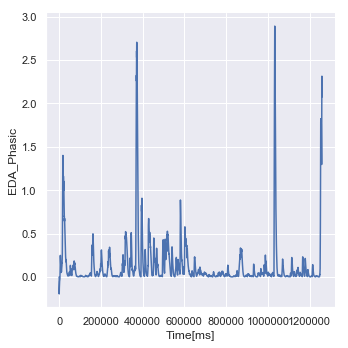

In [10]:
modality = "EDA_Phasic"
AntibuergerFigPhasic = sns.relplot(x = "Time[ms]", y = modality, data = antibuerger, kind = "line")

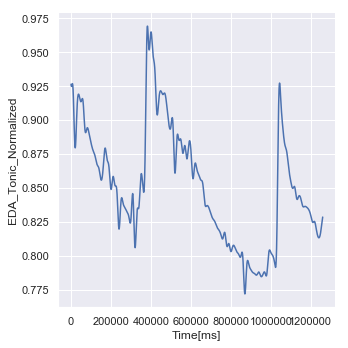

In [12]:
modality = "EDA_Tonic_Normalized"
AntibuergerFigTonicNormalized = sns.relplot(x="Time[ms]", y = modality, data = antibuerger, kind = "line")

C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


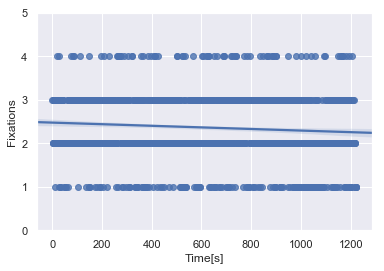

In [18]:
antibuerger_fixations = antibuerger_fixations.rename(index = str, columns = {"Index[s]":"Time[s]"})
plt.ylim(0, 5)
AntibuergerFigFixations = sns.regplot(x = "Time[s]", y = "Fixations", data = antibuerger_fixations)

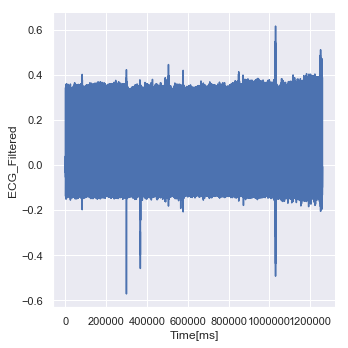

In [27]:
AntibuergerECGFiltered = sns.relplot(x = "Time[ms]", y = "ECG_Filtered", data = antibuerger, kind = "line")

C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


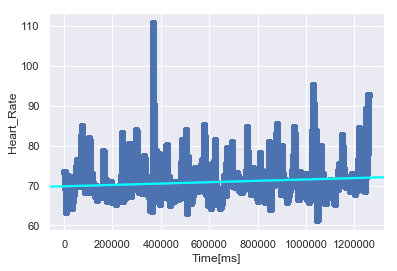

In [40]:
AntibuergerECGHR = sns.regplot(x = "Time[ms]", y = "Heart_Rate", data = antibuerger, fit_reg = True, order = 1,
                               line_kws ={"color":"cyan"})
#AntibuergerECGHR = sns.lmplot(x = "Time[ms]", y = "Heart_Rate", data = antibuerger, fit_reg = True, order = 3)

C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


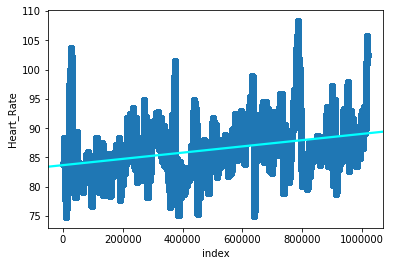

In [8]:
AntibuergerECGHR = sns.regplot(x = "index", y = "Heart_Rate", data = PS, fit_reg = True, order = 1,
                               line_kws ={"color":"cyan"})

C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Alx-Wo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array in

    using multitaper spectrum estimation with 7 DPSS windows


C:\Users\Alx-Wo\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


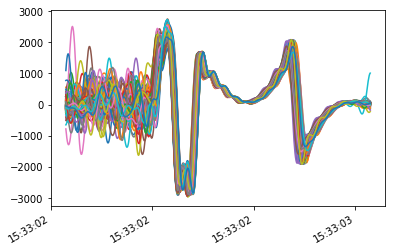

In [6]:
#plotting the cardiac cycles:
bio = nk.bio_process(ecg=baseline["ECG_Raw"], sampling_rate=1000)
pd.DataFrame(bio["ECG"]["Cardiac_Cycles"]).plot(legend=False)

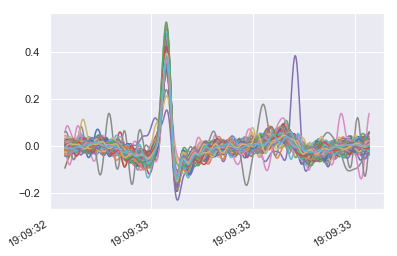

In [37]:
fig = pd.DataFrame(bio["ECG"]["Cardiac_Cycles"]).plot(legend=False)
fig = fig.get_figure()
fig.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\CardiacCyclesImage.svg", format = "svg", dpi = 1200)

In [43]:
#Storing the images
AntibuergerFigFixations.figure.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\FixationsImage.svg", format = "svg", dpi = 1200)
AntibuergerFigTonicNormalized.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\EDA_Tonic_NormalizedImage.svg", format = "svg", dpi = 1200)
AntibuergerFigTonic.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\EDA_TonicImage.svg", format = "svg", dpi = 1200)
AntibuergerFigPhasic.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\EDA_PhasicImage.svg", format = "svg", dpi = 1200)
AntibuergerFigFiltered.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\EDA_FilteredImage.svg", format = "svg", dpi = 1200)
AntibuergerFigRaw.savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\EDA_RawImage.svg", format = "svg", dpi = 1200)
AntibuergerECGHR.get_figure().savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\ECG_HRImage.svg", format = "svg", dpi = 1200)

In [44]:
AntibuergerECGHR.get_figure().savefig("D:\\Dokumente\\Uni\\Vorlesungen\\PdF\\Zwischenvortrag\\ECG_HRImage.png", format = "png", dpi = 1200)